# ASSIGNED Activation energy

<b>This is an exam. You have to work alone on this problem. You are free to consult the book, your notes, the lecture notes, your homeworks and the posted solutions.</b>

Even though we call them rate *constants*, the rate constant changes with temperature. A typical temperature dependence is given by the Arrhenius equation: $k = k_0 \exp\left(\frac{-E_A}{R T}\right)$ where $k_0$ is called the pre-exponential factor, and $E_A$ is called the activation energy. They are both parameters that can be fitted to experimental data. Typically this is done be measuring the rate as a function of temperature, and deriving the $k$ value for each temperature.
The following data was obtained for the thermal cracking of ethane as a function of temperature. Use this data to solve the following problems.

In [1]:
import numpy as np
T = np.array([702, 725, 734, 754, 773, 789, 803, 810, 827, 837])  # °C
k = np.array([0.15, 0.273, 0.33, 0.595, 0.923, 1.492, 2.138, 2.718, 4.137, 4.665]) # 1/s

## What is the reaction order?

Explain how you know.

## Determine $k_0$ and $E_A$ with confidence intervals (do not forget the units!).

Use the best method possible and discuss what your results mean.

## Estimate $k$ at 1000 °C.

## Solution

1.  The reaction is a first order reaction. You can tell this from the units on $k$.

To determine the parameters, we need to perform a nonlinear regression. First we need to convert the temperature to Kelvin.

In [1]:
T = T + 273.15  # convert T to K

Next, we define a model and guess to perform the regression.  We always plot the results to visually judge the fit.

k0 = 5.004e+11 1/s
E_A = 2.34e+05 J/mol.
Confidence intervals:
 [[ -7.77325362e+11   1.77802675e+12]
 [  2.10745717e+05   2.57292571e+05]]
k_{1000 °C} = 125.20 1/s

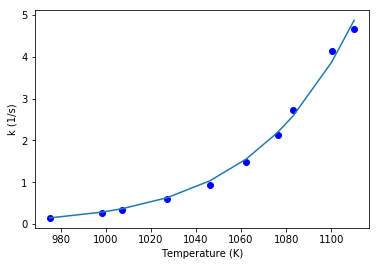

In [1]:
from pycse import nlinfit
R = 8.314 # J / mol / K

def model(T, k0, Ea):
    return k0 * np.exp(-Ea / R / T)

guess = (10**13, 1,)
pnl, pint, se = nlinfit(model, T, k, guess, alpha=0.05)

print('k0 = {:1.4g} 1/s\nE_A = {:1.4g} J/mol.'.format(*pnl))
print('Confidence intervals:\n',pint)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(T, k, 'bo ', T, model(T, *pnl))
plt.xlabel('Temperature (K)')
plt.ylabel('k (1/s)')
print('k_{{1000 °C}} = {:1.2f} 1/s'.format(model(1273.15, *pnl)))

Note that even though we have a good fit, there is a lot of uncertainty on the k0 parameter. The confidence interval is large and contains zero, but in this case it *does not* mean that k0 could be zero. If that was true, then k would always be zero! The confidence interval is large because we have two parameters that are orders of magnitude apart in size.

You could also use linear regression for this problem. The key is to transform the equation as:

$\ln(k) = \ln(k_0) - E_A / R / T$, and then to plot $\ln(k)$ as a function of $1/T$. It should be a line with a slope of $-E_A / R$ and an intercept of $\ln(k_0)$.

k0 = 6.825e+11 1/s
E_A = 2.37e+05 J/mol
k_1000 = 129.46785354175415
kint(95%) = [  2.29546116e+11   2.02895919e+12]
Eaint(95%) = [ 246424.16769427  227475.99852774]

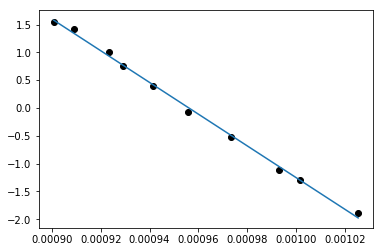

In [1]:
lnk = np.log(k)

x = 1 / T

X = np.column_stack([x**0, x])

from pycse import regress

plr, pint, se = regress(X, lnk, alpha=0.05)

k0 = np.exp(plr[0])
Ea = -plr[1] * R

print('k0 = {:1.4g} 1/s'.format(k0))
print('E_A = {:1.4g} J/mol'.format(Ea))

plt.plot(x, lnk, 'ko ')
plt.plot(x, X @ plr)

print('k_1000 = {}'.format(k0 * np.exp(-Ea / R / 1273.15)))

kint = np.exp(pint[0])
Eaint = -R * pint[1]

print('kint(95%) = {}'.format(kint))
print('Eaint(95%) = {}'.format(Eaint))

You can see the two results are fairly similar from the two approaches.

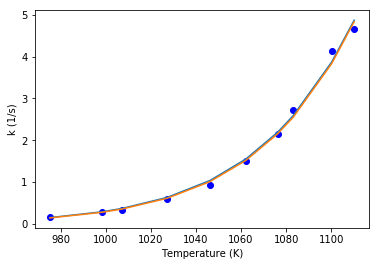

In [1]:
plt.plot(T, k, 'bo ')
plt.plot(T, model(T, *pnl), label='nonlinear regression')
plt.plot(T, k0 * np.exp(-Ea / R / T), label='linear regression')
plt.xlabel('Temperature (K)')
plt.ylabel('k (1/s)')